In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [76]:
path_to_csv = '/content/drive/My Drive/Latihan/movies.csv'
df = pd.read_csv(path_to_csv)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


##Data Cleaning

###Missing Data

In [77]:
print(df.isna().sum())
print(len(df))

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64
7668


###Handling Missing Data

In [78]:
#Mengubah missing data pada kolom budget dan gross menjadi rata-rata
df.fillna(df.mean(), inplace=True)
df.isna().sum()

<ipython-input-78-7f532dd65f4c>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


name         0
rating      77
genre        0
year         0
released     2
score        0
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      0
dtype: int64

In [79]:
#Karena jumlah tidak terlalu signifikan drop beberapa kolom yang masih ada missing value
df.dropna(subset=['rating','released','writer', 'company'], inplace=True)
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

### Duplicate Data

In [80]:
df.duplicated().sum()

0

##Data Understanding

###Data Type

In [81]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [82]:
#change data type
df['budget'] = df['budget'].astype(int)
df['gross'] = df['gross'].astype(int)
df['score'] = df['score'].round(1)
df['votes'] = df['votes'].astype(int)
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


##Data Visualization

###Visualization Budget VS Gross

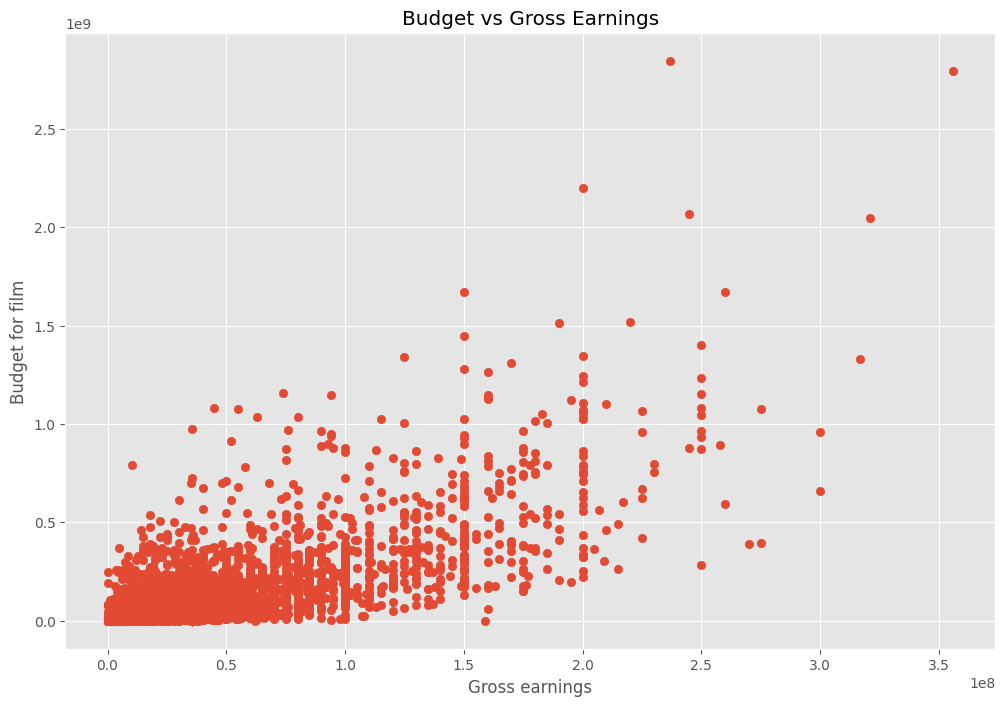

In [83]:
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross earnings')
plt.ylabel('Budget for film')
plt.grid(True)
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

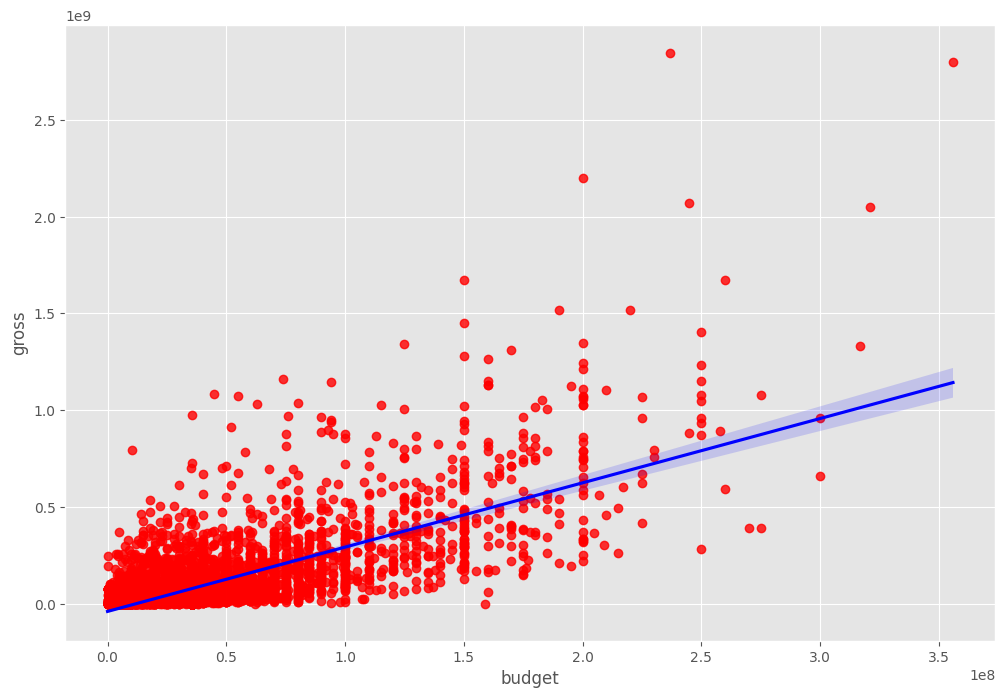

In [84]:
# budget vs gross seaborn
sns.regplot(x='budget', y='gross', data=df,scatter_kws={'color': "red"}, line_kws={'color':'blue'})

<ipython-input-85-265cd64599b5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


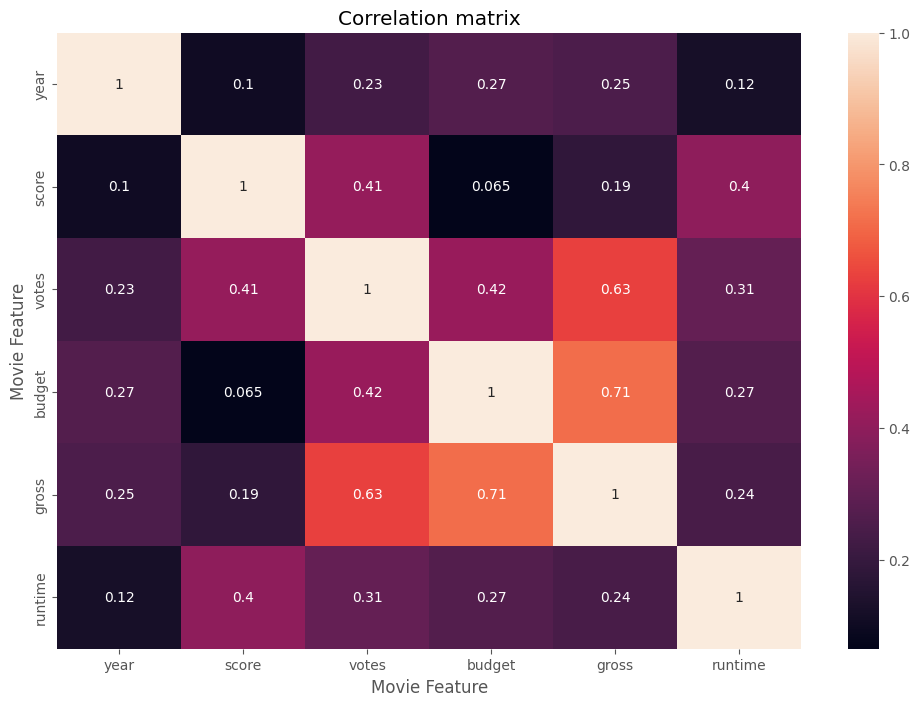

In [85]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')
plt.show()

In [86]:
df_numerized = df

for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,527,5,0,2009,688,7.8,1100000,1137,1757,2284,55,237000000,2847246203,2209,162.0
7445,529,5,0,2019,180,8.4,903000,160,730,2193,55,356000000,2797501328,1572,181.0
3045,6813,5,6,1997,696,7.8,1100000,1137,1757,1560,55,200000000,2201647264,2209,194.0
6663,5077,5,0,2015,690,7.8,876000,1107,2519,508,55,245000000,2069521700,1506,138.0
7244,530,5,0,2018,189,8.4,897000,160,730,2193,55,321000000,2048359754,1572,149.0


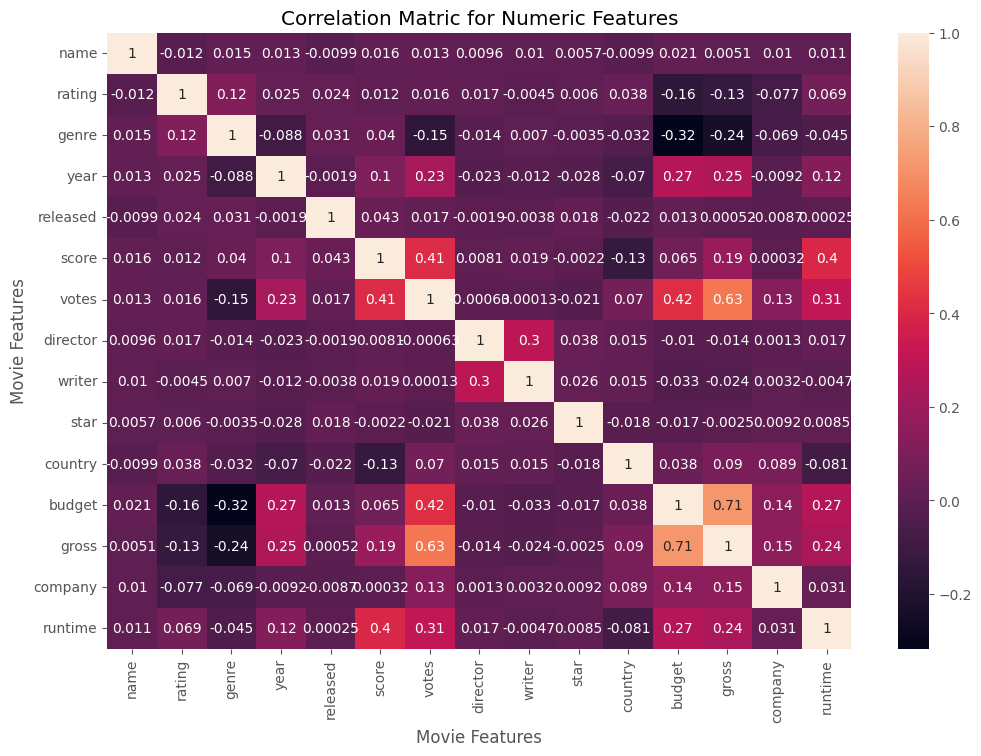

In [87]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [88]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.011944
          genre       0.015250
          year        0.013483
          released   -0.009936
          score       0.016160
          votes       0.013174
          director    0.009605
          writer      0.010271
          star        0.005666
          country    -0.009942
          budget      0.020954
          gross       0.005071
          company     0.010085
          runtime     0.011130
rating    name       -0.011944
          rating      1.000000
          genre       0.117657
          year        0.025120
          released    0.024450
          score       0.011563
          votes       0.016092
          director    0.017211
          writer     -0.004538
          star        0.005972
          country     0.037765
          budget     -0.156385
          gross      -0.129384
          company    -0.076860
          runtime     0.069152
genre     name        0.015250
          rating      0.117657
        

In [89]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.316818
budget    genre      -0.316818
gross     genre      -0.238240
genre     gross      -0.238240
rating    budget     -0.156385
budget    rating     -0.156385
genre     votes      -0.148341
votes     genre      -0.148341
score     country    -0.130144
country   score      -0.130144
gross     rating     -0.129384
rating    gross      -0.129384
year      genre      -0.088103
genre     year       -0.088103
runtime   country    -0.081417
country   runtime    -0.081417
company   rating     -0.076860
rating    company    -0.076860
year      country    -0.070084
country   year       -0.070084
company   genre      -0.068755
genre     company    -0.068755
runtime   genre      -0.044531
genre     runtime    -0.044531
writer    budget     -0.033407
budget    writer     -0.033407
genre     country    -0.031503
country   genre      -0.031503
star      year       -0.027507
year      star       -0.027507
writer    gross      -0.023732
gross     writer     -0.023732
director

In [90]:
corr_sorted = sorted_pairs[(sorted_pairs) > 0.4]
corr_sorted

runtime   score       0.400527
score     runtime     0.400527
          votes       0.411938
votes     score       0.411938
budget    votes       0.421218
votes     budget      0.421218
gross     votes       0.629325
votes     gross       0.629325
gross     budget      0.712561
budget    gross       0.712561
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64